**Clipping Rivers to a County**

In [19]:
import geopandas as gpd
from geopandas import GeoDataFrame
counties = gpd.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")


In [22]:
print(counties.shape)
print(counties.crs)


(3221, 8)
EPSG:4326


In [28]:
counties.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.7179 32.4028..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.5778 33.76532, -86.75914 33.8406..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87052, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.5817, -88.13925 34.5878..."


In [57]:
# Filter the row where id == '01001'
county_row = counties[counties["id"] == "01001"]
print(county_row)
print(county_row["geometry"].values[0])

      id  ...                                           geometry
0  01001  ...  POLYGON ((-86.49677 32.34444, -86.7179 32.4028...

[1 rows x 8 columns]
POLYGON ((-86.496774 32.344437, -86.717897 32.402814, -86.814912 32.340803, -86.890581 32.502974, -86.917595 32.664169, -86.71339 32.661732, -86.714219 32.705694, -86.413116 32.707386, -86.411172 32.409937, -86.496774 32.344437))


In [11]:
rivers = gpd.read_file(
  "https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip"
)


In [31]:
rivers.head()


,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,ne_id,label,wikidataid,name_ar,name_bn,name_de,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,975River,9,River,None,None,975,None,7.1,None,8.1,1159128965,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"LINESTRING (22.75649 -20.47161, 22.79458 -20.4..."
1,976River,9,River,Rungwa,None,976,None,7.1,Rungwa,8.1,1159128967,Rungwa,Q35311383,رونجوا,রুংওয়া,Rungwa River,Rungwa,Rungwa,Ρούνγκβα,रुंगवा,Rungwa,Rungwa,Rungwa,ルングワ川,룽와,Rungwa,Rungwa,Rungwa,река Рунгва,Rungwa,Rungwa,Sông Rungwa,伦瓜河,رونگوا,רונגווה,Рунгва,رنگوا,倫瓜河,"MULTILINESTRING ((32 -7.24993, 32.02793 -7.238..."
2,977River,9,River,Ligonha,None,977,None,7.1,Ligonha,8.1,1159128969,Ligonha,None,ليجونها,লিগোনহা,Ligonha,Ligonha,Ligonha,Λιγκόνια,लिगोन्हा,Ligonha,Ligonha,Ligonha,リゴンハ川,리고냐,Ligonha,Ligonha,Ligonha,река Лигонья,Ligonha,Ligonha,Sông Ligonha,利戈尼亚河,لیگونها,ליגונה,Лігонха,لیگونہا,利戈尼亞河,"MULTILINESTRING ((39.12783 -16.86663, 39.12598..."
3,978River,9,River,Dongwe,None,978,None,7.1,Dongwe,8.1,1159128971,Dongwe,None,دونغوي,দঙ্গোয়ে,Dongwe,Dongwe,Dongwe,Ντόνγκβε,डोंगवे,Dongwe,Dongwe,Dongwe,ドングウェ川,동웨,Dongwe,Dongwe,Dongwe,река Донгу,Dongwe,Dongwe,Sông Dongwe,松威河,دونگوه,דונגווה,Донгве,ڈانگوے,東威河,"LINESTRING (25.5333 -14.58333, 25.49502 -14.59..."
4,979River,9,River,Cuito,None,979,None,7.1,Cuito,8.1,1159128973,Cuito,Q1143331,كيتو,কুইটো,Cuito,Cuito,Rio Cuito,Κουίτο,क्यूटो,Cuito,Cuito,Cuito,クイト川,쿠이토,Cuito,Cuito,Cuito,река Квито,Cuito,Cuito,Sông Cuito,奎托河,کیتو,קיטו,Куіто,کیوٹو,奎托河,"MULTILINESTRING ((20.75 -17.99993, 20.75234 -1..."


In [14]:
print(type(rivers))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [12]:
rivers.shape

(1473, 39)

In [34]:
print(counties.iloc[0]["id"])
print(len(gpd.clip(rivers, counties.iloc[0]["geometry"])))


01001
1


In [43]:
# Clipping means:From all the rivers, keep only the parts that intersect with the geometry of one_county.

one_county = counties.iloc[0]
county_geom = one_county['geometry']

clipped_rivers = gpd.clip(rivers, county_geom)

print(clipped_rivers)

      dissolve  ...                                           geometry
1371  251River  ...  MULTILINESTRING ((-86.41118 32.41074, -86.4125...

[1 rows x 39 columns]


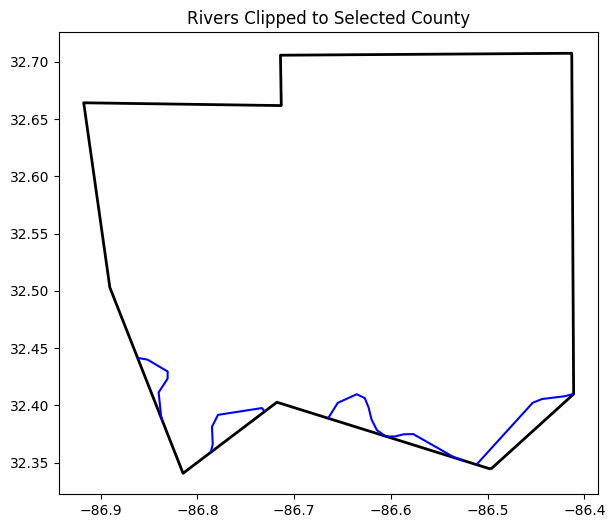

In [44]:
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
gpd.GeoSeries(county_geom).plot(ax=ax, edgecolor='black', facecolor='none', linewidth=2)
clipped_rivers.plot(ax=ax, color='blue')
plt.title("Rivers Clipped to Selected County")
plt.show()


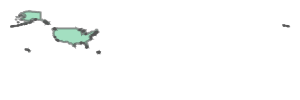

In [46]:
merged_county_shape=counties.unary_union
merged_county_shape

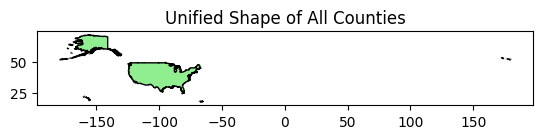

In [59]:
# Plot result
gpd.GeoSeries(merged_county_shape).plot(edgecolor='black', facecolor='lightgreen')
plt.title("Unified Shape of All Counties")
plt.show()